# import libraries

In [242]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore')

In [243]:
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan

# Basic 

In [244]:
df = pd.read_csv(r'C:\Users\sahno\Downloads\tips (data for regression problem).csv')

In [245]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [246]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [247]:
df.shape

(244, 7)

In [248]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [249]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [250]:
df.time.value_counts()

time
Dinner    176
Lunch      68
Name: count, dtype: int64

In [251]:
df.day.value_counts()

day
Sat     87
Sun     76
Thur    62
Fri     19
Name: count, dtype: int64

In [252]:
df.smoker.value_counts()

smoker
No     151
Yes     93
Name: count, dtype: int64

# data analysis

In [253]:
df = pd.get_dummies(df, columns=['sex', 'smoker', 'day', 'time'], drop_first=False).astype(int)

In [254]:
df

,total_bill,tip,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
0,16,1,2,1,0,1,0,0,0,1,0,1,0
1,10,1,3,0,1,1,0,0,0,1,0,1,0
2,21,3,3,0,1,1,0,0,0,1,0,1,0
3,23,3,2,0,1,1,0,0,0,1,0,1,0
4,24,3,4,1,0,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29,5,3,0,1,1,0,0,1,0,0,1,0
240,27,2,2,1,0,0,1,0,1,0,0,1,0
241,22,2,2,0,1,0,1,0,1,0,0,1,0
242,17,1,2,0,1,1,0,0,1,0,0,1,0


In [255]:
df.tip.value_counts()

tip
2     78
3     68
1     45
4     25
5     20
6      5
7      1
10     1
9      1
Name: count, dtype: int64

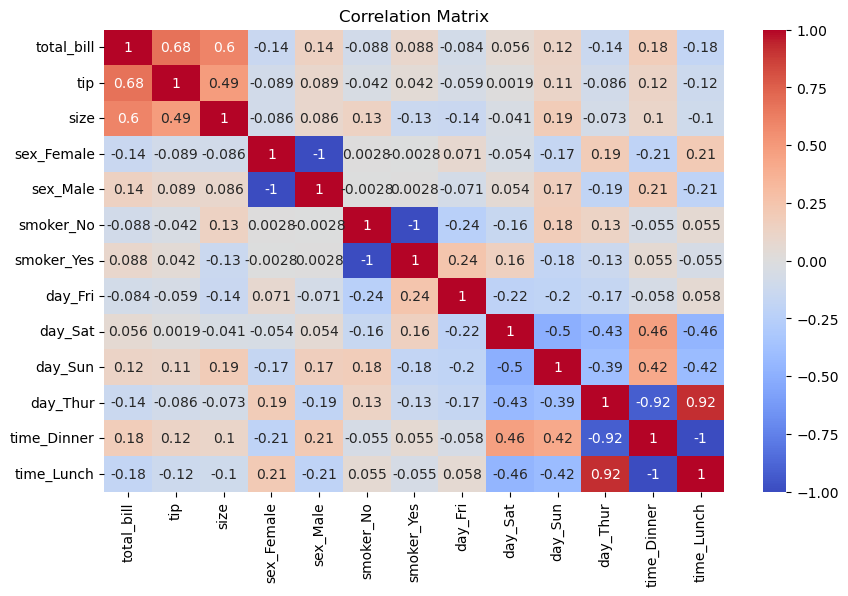

In [256]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### the correlation matrix shows that the 'tip' is mostly affected by the Total Bill and the Size of the people visting the restaurant.

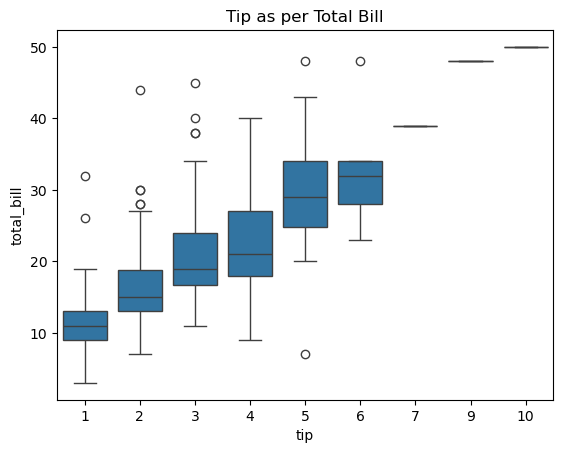

In [257]:
sns.boxplot(y='total_bill', x='tip', data=df)
plt.title('Tip as per Total Bill')
plt.show()

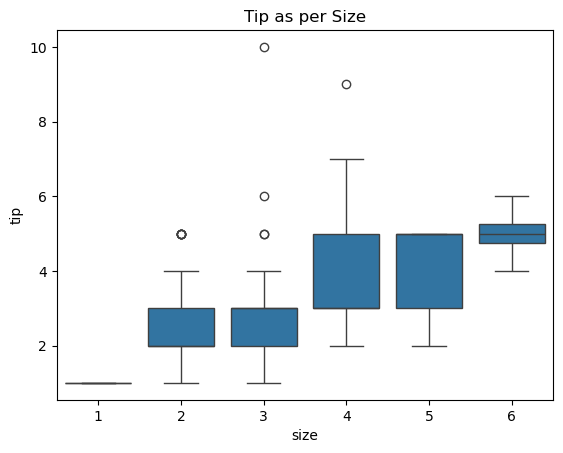

In [258]:
sns.boxplot(y='tip', x='size', data=df)
plt.title('Tip as per Size')
plt.show()

In [259]:
df['day'] = df[['day_Sat', 'day_Sun', 'day_Thur','day_Fri']].idxmax(axis=1)

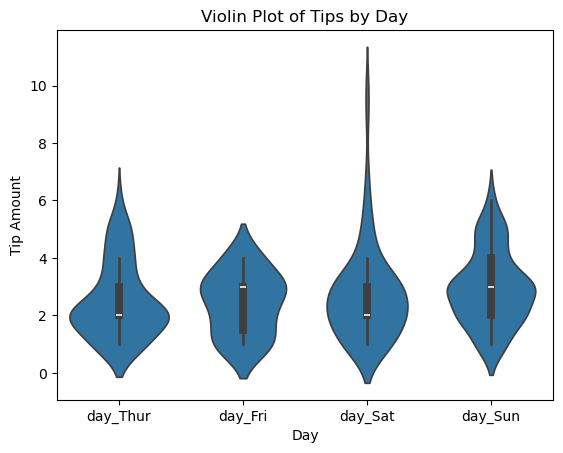

In [260]:
sns.violinplot(x='day', y='tip', data=df, order=['day_Thur','day_Fri', 'day_Sat', 'day_Sun'])
plt.title('Violin Plot of Tips by Day')
plt.xlabel('Day')
plt.ylabel('Tip Amount')
plt.show()

In [261]:
# Average tip for each day
df.groupby('day')['tip'].mean()

day
day_Fri     2.421053
day_Sat     2.712644
day_Sun     2.947368
day_Thur    2.500000
Name: tip, dtype: float64

# Modelling

In [262]:
X = df.drop('tip', axis=1)  
y = df['tip']            
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [263]:
X_train = X_train.drop(columns=['day'])
X_test = X_test.drop(columns=['day'])

In [264]:
X_train

,total_bill,size,sex_Female,sex_Male,smoker_No,smoker_Yes,day_Fri,day_Sat,day_Sun,day_Thur,time_Dinner,time_Lunch
228,13,2,0,1,1,0,0,1,0,0,1,0
208,24,2,0,1,0,1,0,1,0,0,1,0
96,27,2,0,1,0,1,1,0,0,0,1,0
167,31,4,0,1,1,0,0,0,1,0,1,0
84,15,2,0,1,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
106,20,2,0,1,0,1,0,1,0,0,1,0
14,14,2,1,0,1,0,0,0,1,0,1,0
92,5,2,1,0,0,1,1,0,0,0,1,0
179,34,2,0,1,0,1,0,0,1,0,1,0


In [265]:
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree Regressor": DecisionTreeRegressor(max_depth=5, min_samples_split=12, min_samples_leaf=9, random_state=2),
    "Random Forest Regressor": RandomForestRegressor(random_state=23, n_estimators=100),
    "Support Vector Regressor": SVR(kernel='rbf',C=2, epsilon= 0.1),
    "K-Nearest Neighbors Regressor": KNeighborsRegressor(n_neighbors=5)
}

In [266]:
results = []

In [267]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    results.append({
        "Model": name,
        "RMSE": rmse,
        "R2 Score": r2
    })

In [268]:
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='R2 Score', ascending=False))

                           Model      RMSE  R2 Score
5       Support Vector Regressor  0.807814  0.562590
2               Lasso Regression  0.831124  0.536981
3        Decision Tree Regressor  0.863396  0.500326
1               Ridge Regression  0.888399  0.470967
0              Linear Regression  0.889138  0.470086
6  K-Nearest Neighbors Regressor  0.932847  0.416706
4        Random Forest Regressor  1.044401  0.268859


### SVM performs best among the models with R2 Score of  0.562590

# Insights

#### 
1. The more the restaurant tries to make the custmomer pay more i.e. if the bill is high , the tip is more. And to do this,
they can make the prices higher(though not a good option), add more items to their menu, fency and luxurious dishes can be added
or maybe something that keep the cusotmer in the restaurant for a longer time e.g. by inviting some singer to perform.
2. They can offer more family packages, or friends party deals so to increase the group size as that is a also a good factor
 for a big tip!

#  checking for Linear Trends

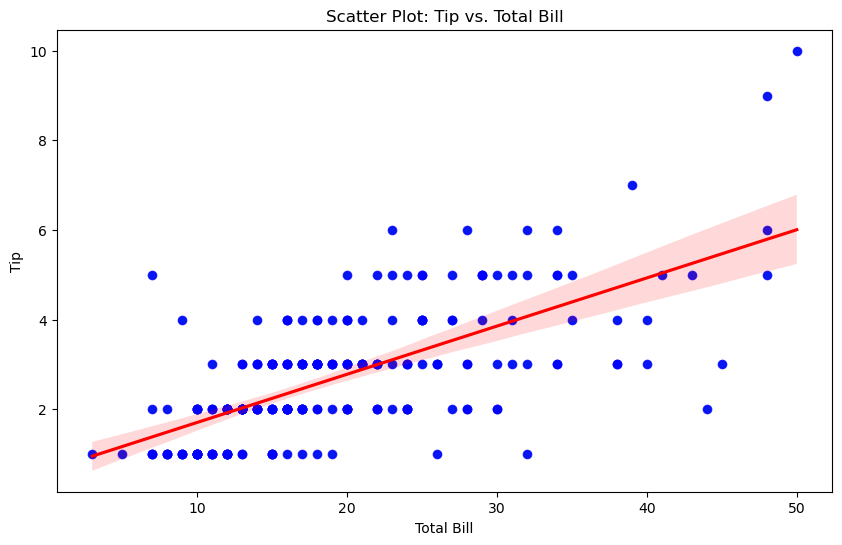

In [269]:
#Scatter Plots
plt.figure(figsize=(10, 6))
sns.scatterplot(x='total_bill', y='tip', data= df)
sns.regplot(x='total_bill', y='tip', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.title('Scatter Plot: Tip vs. Total Bill')
plt.xlabel('Total Bill')
plt.ylabel('Tip')
plt.show()

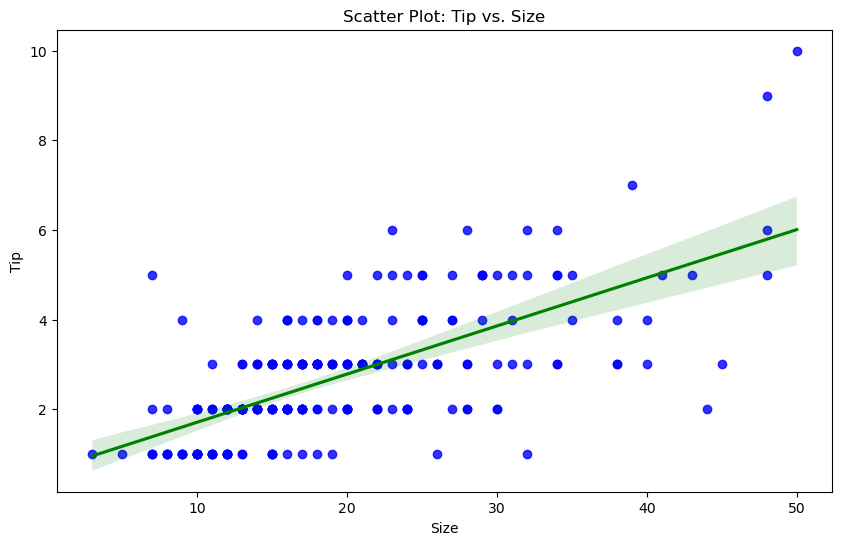

In [276]:
plt.figure(figsize=(10, 6))
sns.regplot(x='total_bill', y='tip', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'green'})
plt.title('Scatter Plot: Tip vs. Size')
plt.xlabel('Size')
plt.ylabel('Tip')
plt.show()

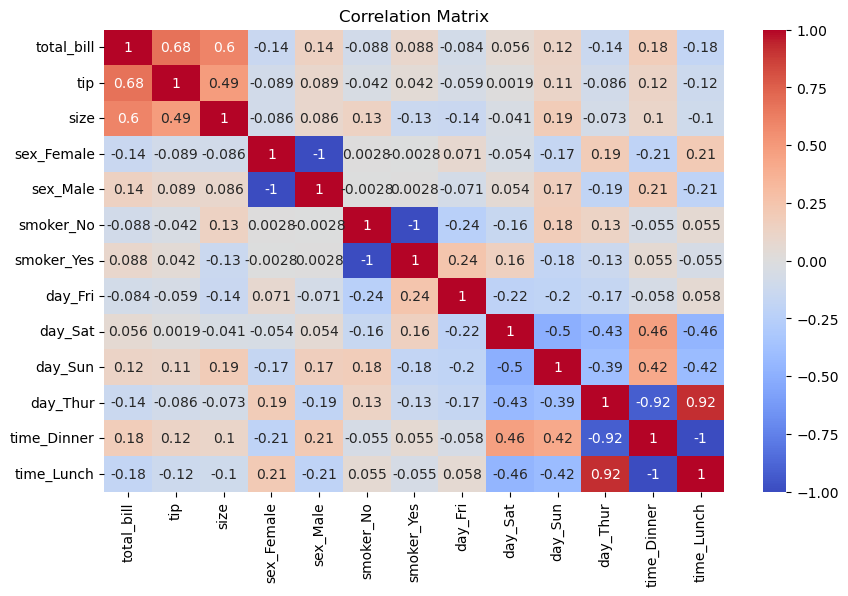

In [256]:
# Correlation Matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

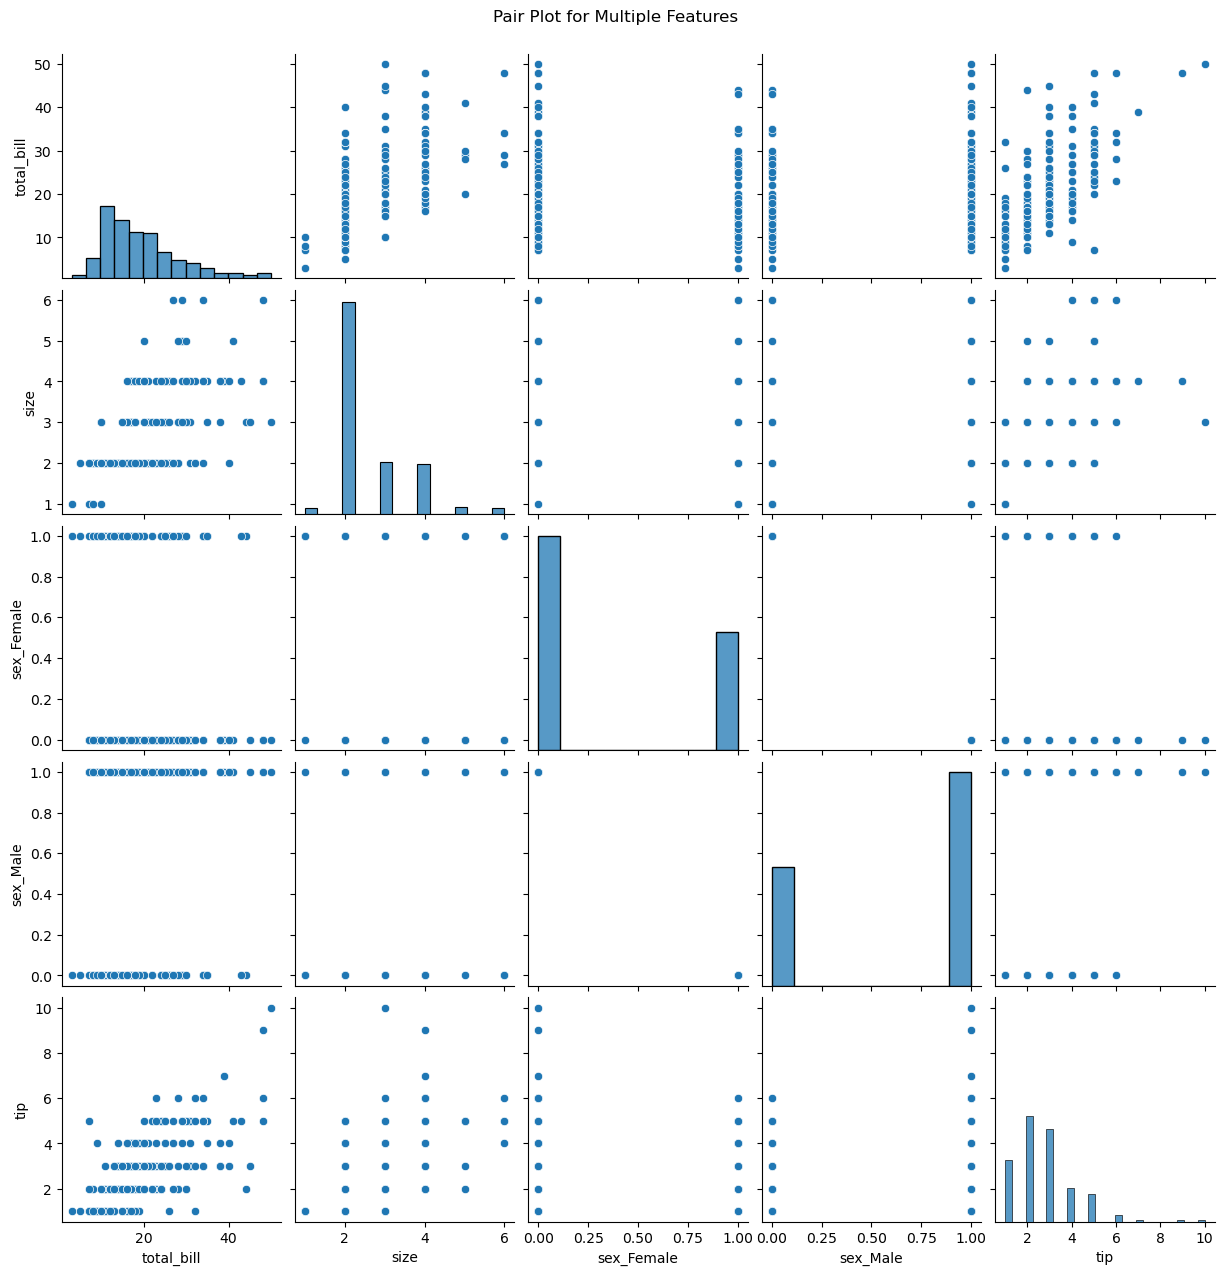

In [277]:
#PairPlots
sns.pairplot(df[['total_bill', 'size', 'sex_Female', 'sex_Male', 'tip']])
plt.suptitle('Pair Plot for Multiple Features', y=1.02)
plt.show()

In [289]:
from scipy import stats
from statsmodels.stats.diagnostic import linear_rainbow

In [290]:
# Rainbow Test for Linearity
X = sm.add_constant(df['total_bill'])
y = df['tip']
model = sm.OLS(y, X).fit()
rainbow_statistic, rainbow_p_value = linear_rainbow(model)

In [291]:
print(f"Rainbow Test Statistic: {rainbow_statistic:.4f}")
print(f"Rainbow Test p-value: {rainbow_p_value:.4f}")

Rainbow Test Statistic: 1.0959
Rainbow Test p-value: 0.3079


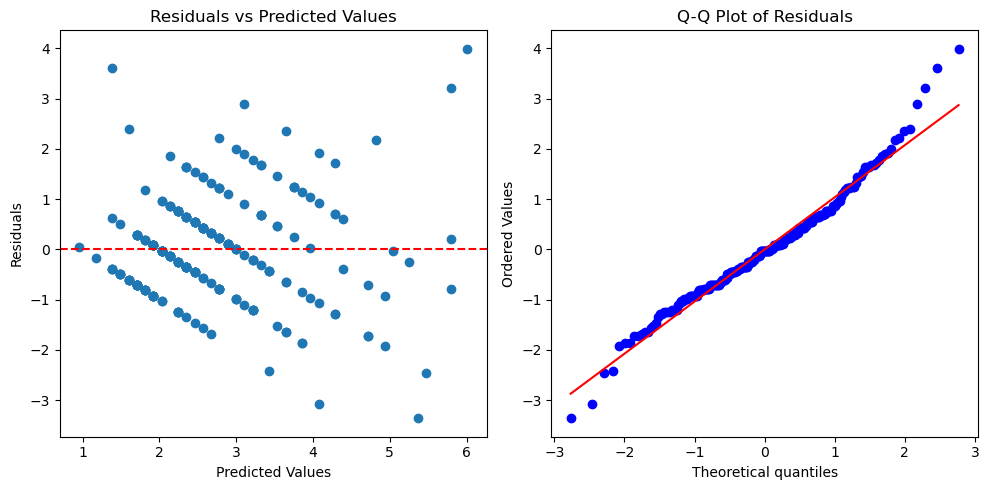

In [295]:
# Plotting residuals to check for linearity
def plot_residuals(X, y):
    model = LinearRegression()
    model.fit(X.reshape(-1, 1), y)
    predictions = model.predict(X.reshape(-1, 1))
    residuals = y - predictions
    
    plt.figure(figsize=(10, 5))
    
    # Residuals vs Predicted
    plt.subplot(121)
    plt.scatter(predictions, residuals)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Predicted Values')
    plt.ylabel('Residuals')
    plt.title('Residuals vs Predicted Values')
    
    # Q-Q Plot
    plt.subplot(122)
    stats.probplot(residuals, dist="norm", plot=plt)
    plt.title('Q-Q Plot of Residuals')
    plt.tight_layout()
    plt.show()

plot_residuals(df['total_bill'].values, df['tip'].values)

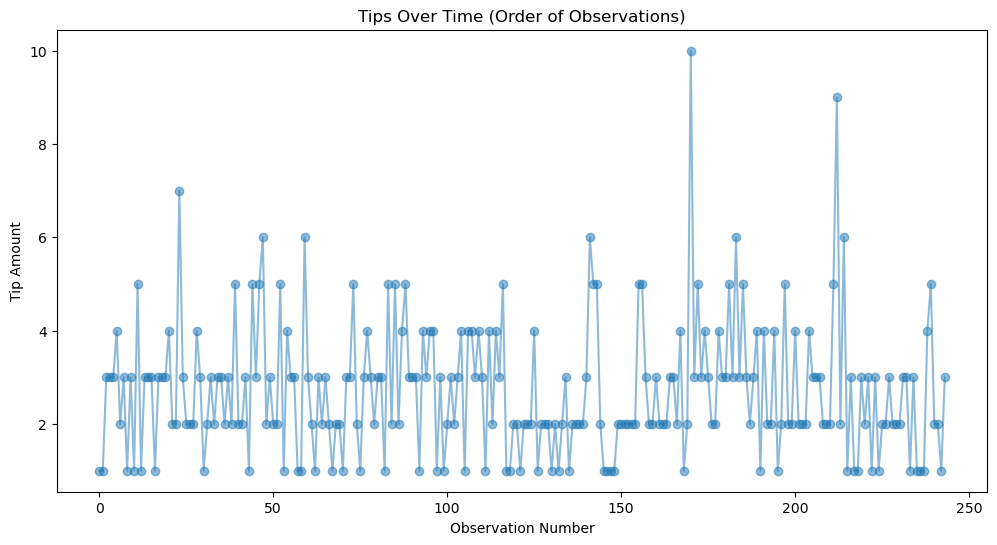

In [297]:
#TimeSeries
plt.figure(figsize=(12, 6))
plt.plot(range(len(df)), df['tip'], marker='o', linestyle='-', alpha=0.5)
plt.title('Tips Over Time (Order of Observations)')
plt.xlabel('Observation Number')
plt.ylabel('Tip Amount')
plt.show()

In [299]:
#Non-linear Pattern Check using Polynomial Features
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline


# Compare Linear vs Polynomial Regression
X = df['total_bill'].values.reshape(-1, 1)
y = df['tip'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_score = r2_score(y_test, linear_model.predict(X_test))

# Polynomial Model (degree=2)
poly_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('linear', LinearRegression())
])
poly_model.fit(X_train, y_train)
poly_score = r2_score(y_test, poly_model.predict(X_test))

# Print Results
print(f"\nLinear Model R² Score: {linear_score:.4f}")
print(f"Polynomial Model R² Score: {poly_score:.4f}")


Linear Model R² Score: 0.5520
Polynomial Model R² Score: 0.5455
